# Micro-Credit Loan Analysis:-

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn

import warnings
warnings.filterwarnings('ignore')

# Importing the Dataset:-

In [4]:
df=pd.read_csv(r"C:\Users\User\Downloads\Data file.csv")
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [5]:
df.shape

(209593, 37)

In [6]:
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [7]:
df.describe()

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,104797.000000,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,60504.431823,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,1.000000,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52399.000000,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,104797.000000,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,157195.000000,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,209593.000000,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


# Data Cleaning:-

In [7]:
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

Above observations shows that there are no null values present in this dataset.

In [8]:
df.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

Observations shows that columns 'pCircle','pdate' and 'msisdn' are object type and rest are integer and float type.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

In [8]:
#categorical features
categorical = df.select_dtypes(include =[np.object])
print("Categorical Features in  DataSet:",categorical.shape[1])

#numerical features
numerical= df.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in DataSet:",numerical.shape[1])

Categorical Features in  DataSet: 3
Numerical Features in DataSet: 34


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,209593.0,104797.000000,60504.431823,1.000000,52399.000,104797.000000,157195.00,209593.000000
label,209593.0,0.875177,0.330519,0.000000,1.000,1.000000,1.00,1.000000
aon,209593.0,8112.343445,75696.082531,-48.000000,246.000,527.000000,982.00,999860.755168
daily_decr30,209593.0,5381.402289,9220.623400,-93.012667,42.440,1469.175667,7244.00,265926.000000
daily_decr90,209593.0,6082.515068,10918.812767,-93.012667,42.692,1500.000000,7802.79,320630.000000
rental30,209593.0,2692.581910,4308.586781,-23737.140000,280.420,1083.570000,3356.94,198926.110000
rental90,209593.0,3483.406534,5770.461279,-24720.580000,300.260,1334.000000,4201.79,200148.110000
last_rech_date_ma,209593.0,3755.847800,53905.892230,-29.000000,1.000,3.000000,7.00,998650.377733
last_rech_date_da,209593.0,3712.202921,53374.833430,-29.000000,0.000,0.000000,0.00,999171.809410
last_rech_amt_ma,209593.0,2064.452797,2370.786034,0.000000,770.000,1539.000000,2309.00,55000.000000


# EDA and Data Visualization:-

Data Analysis:

We will do Univariate Analysis to understand the distribution of continuous features and count of the categorical features. Then
we will do Bivariate Analysis to understand relation between feature vs target and feature vs feature. 

Univariate Analysis:-

1    183431
0     26162
Name: label, dtype: int64

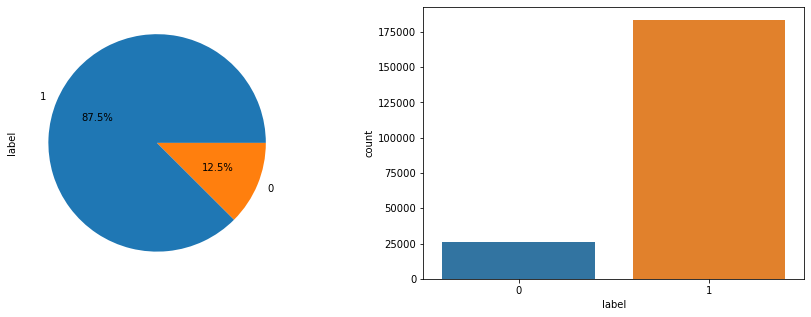

In [12]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['label'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['label'])
df['label'].value_counts()

The Target variable 'label' imbalanced, thus we have to balanced that.

6     180945
12     26605
0       2043
Name: maxamnt_loans90, dtype: int64

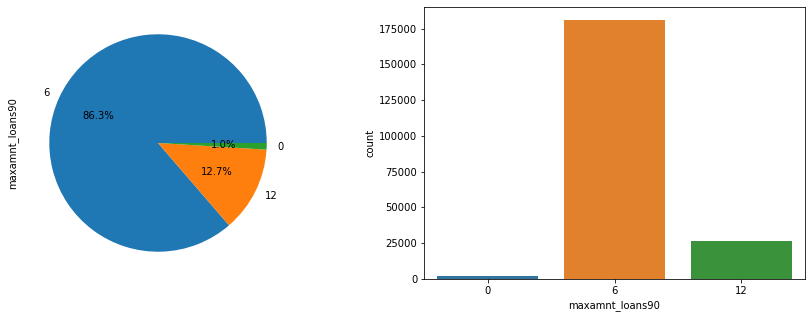

In [13]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['maxamnt_loans90'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['maxamnt_loans90'])
df['maxamnt_loans90'].value_counts()

0.0    195445
1.0      7149
0.5      6538
2.0       420
1.5        38
3.0         3
Name: medianamnt_loans30, dtype: int64

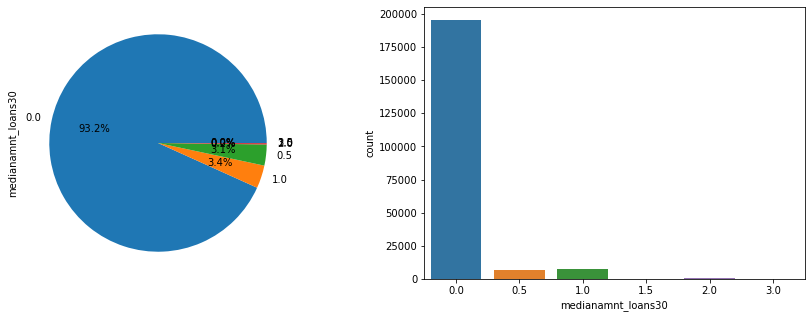

In [14]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['medianamnt_loans30'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['medianamnt_loans30'])
df['medianamnt_loans30'].value_counts()

0.0    197424
1.0      6172
0.5      5668
2.0       307
1.5        19
3.0         3
Name: medianamnt_loans90, dtype: int64

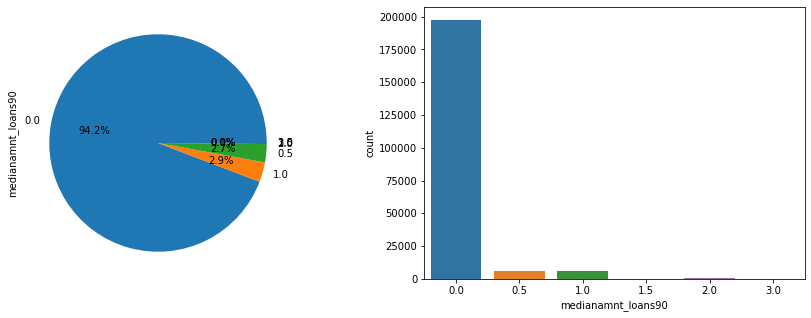

In [15]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['medianamnt_loans90'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['medianamnt_loans90'])
df['medianamnt_loans90'].value_counts()

UPW    209593
Name: pcircle, dtype: int64

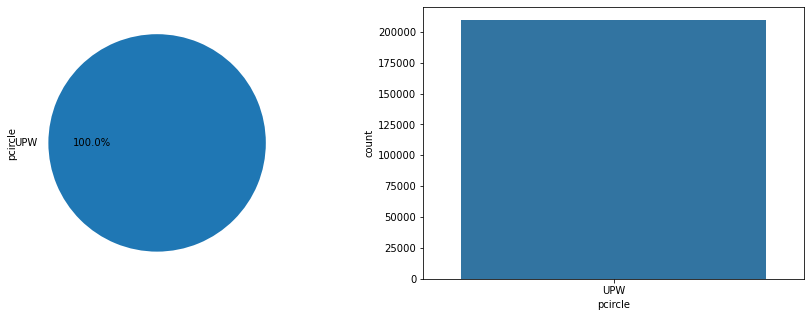

In [17]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['pcircle'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['pcircle'])
df['pcircle'].value_counts()

In [18]:
df['pdate'].value_counts()

2016-07-04    3150
2016-07-05    3127
2016-07-07    3116
2016-06-20    3099
2016-06-17    3082
              ... 
2016-06-04    1559
2016-08-18    1407
2016-08-19    1132
2016-08-20     788
2016-08-21     324
Name: pdate, Length: 82, dtype: int64

In [19]:
df['msisdn'].value_counts()

47819I90840    7
04581I85330    7
60744I91197    6
71742I90843    6
30080I90588    6
              ..
77742I70373    1
90600I88688    1
45319I70377    1
35294I94567    1
93273I84454    1
Name: msisdn, Length: 186243, dtype: int64

Bivariate Analysis:-

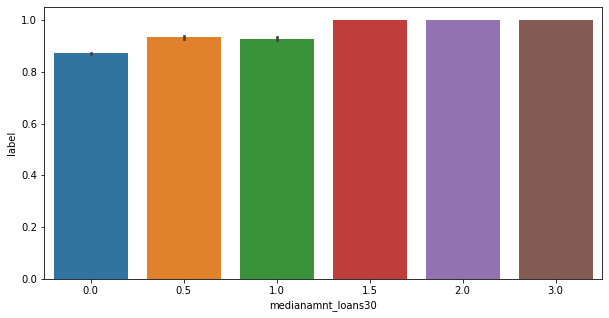

In [20]:
plt.figure(figsize=(10,5))
sns.barplot(y='label',x='medianamnt_loans30',data=df)
plt.show()

The median amount loans 30 increases with respect to the label.

Text(-2.700000000000003, 0.5, 'Number of days till last recharge of main account')

<Figure size 720x360 with 0 Axes>

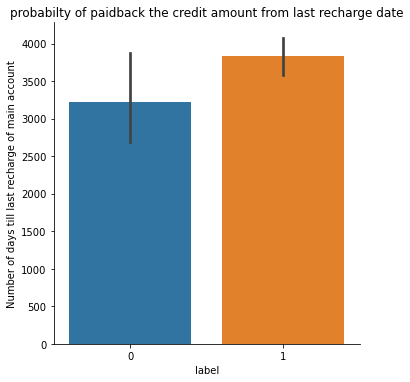

In [23]:
#factorplot of label vs last recharge date to main account

plt.figure(figsize=(10,5))
sns.factorplot(x='label',y='last_rech_date_ma',data=df,kind='bar')
plt.title('probabilty of paidback the credit amount from last recharge date')
plt.ylabel('Number of days till last recharge of main account')

Text(-2.700000000000003, 0.5, 'Number of days till last recharge of main account')

<Figure size 720x360 with 0 Axes>

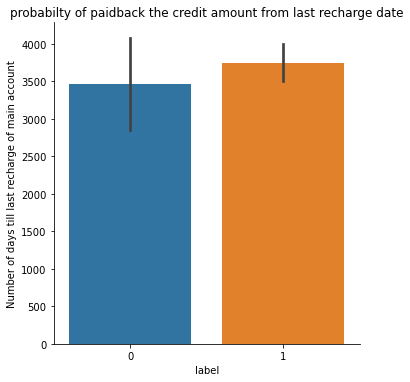

In [24]:
#factorplot of label vs last recharge date to data account

plt.figure(figsize=(10,5))
sns.factorplot(x='label',y='last_rech_date_da',data=df,kind='bar')
plt.title('probabilty of paidback the credit amount from last recharge date')
plt.ylabel('Number of days till last recharge of main account')

Text(-2.700000000000003, 0.5, 'Median recharges done in main account over last 90 days')

<Figure size 720x360 with 0 Axes>

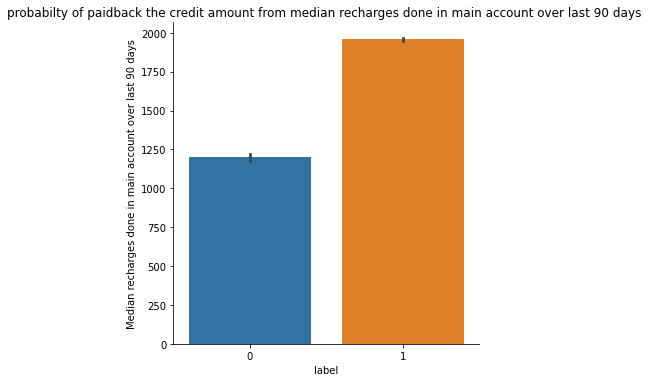

In [25]:
#factorplot of label vs median recharges done in main account over last 90 days

plt.figure(figsize=(10,5))
sns.factorplot(x='label',y='medianamnt_ma_rech90',data=df,kind='bar')
plt.title('probabilty of paidback the credit amount from median recharges done in main account over last 90 days ')
plt.ylabel('Median recharges done in main account over last 90 days')

Text(0.42499999999999716, 0.5, 'Median of amounts of loan taken by the user in last 90 days')

<Figure size 720x360 with 0 Axes>

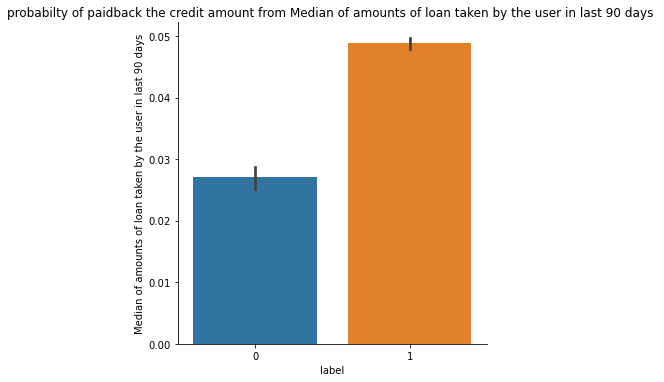

In [27]:
#factorplot of label vs Median of amounts of loan taken by the user in last 90 days

plt.figure(figsize=(10,5))
sns.factorplot(x='label',y='medianamnt_loans90',data=df,kind='bar')
plt.title('probabilty of paidback the credit amount from Median of amounts of loan taken by the user in last 90 days ')
plt.ylabel('Median of amounts of loan taken by the user in last 90 days')

Text(16.424999999999997, 0.5, 'Average payback time in days over last 90 days')

<Figure size 720x360 with 0 Axes>

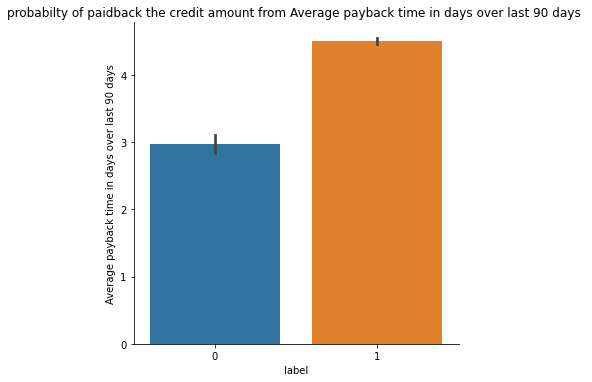

In [28]:
#factorplot of label vs Average payback time in days over last 90 days

plt.figure(figsize=(10,5))
sns.factorplot(x='label',y='payback90',data=df,kind='bar')
plt.title('probabilty of paidback the credit amount from Average payback time in days over last 90 days ')
plt.ylabel('Average payback time in days over last 90 days')

# Correlation:-

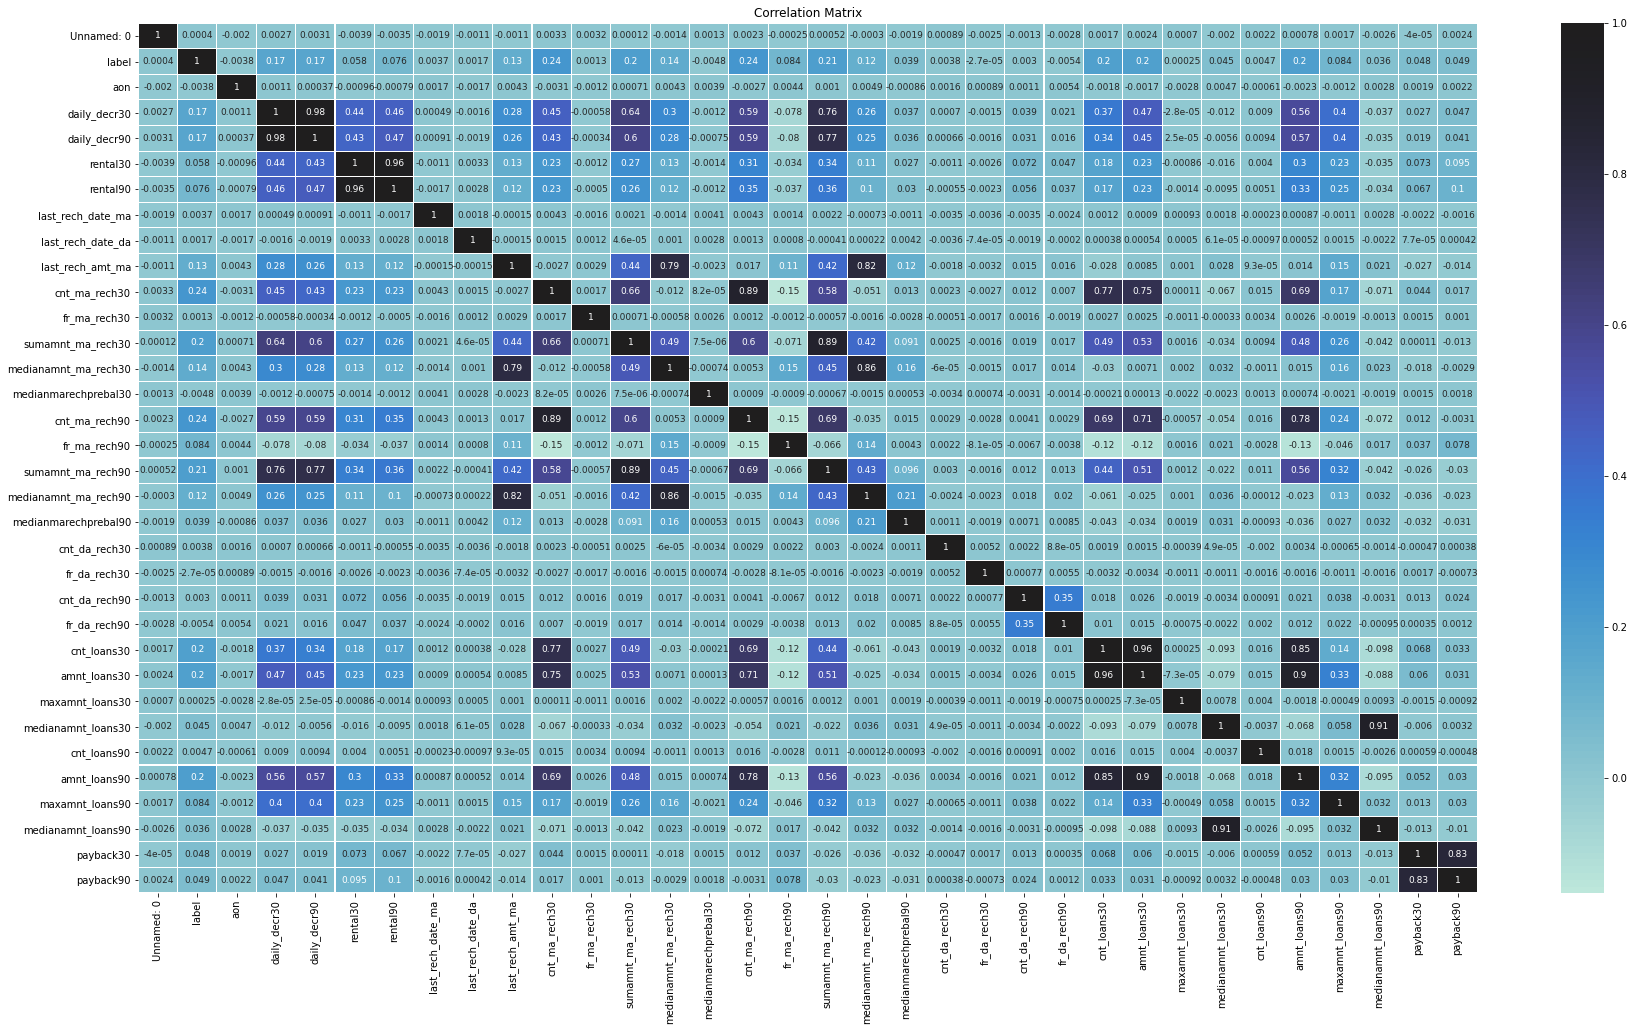

In [10]:
# Checking correlation matrix(heatmap) to understand the feature vs feature relationship.

corr=df.corr()
plt.figure(figsize=(30,16))
sns.heatmap(corr,annot=True,linewidths=.1,fmt='.2g',center=True,annot_kws={'size':9})
plt.title('Correlation Matrix')
plt.show()

correlation between daily_decr90 and daily_decr30, rental90 and rental30,sumamnt_ma_rech90 with daily_decr90 and daily_decr30, 
sumamnt_ma_rech30 correlation between medianamnt_ma_rech90 with last_rech_amt_ma, correlation between cnt_ma_rech30 with 
cnt_ma_rech90,amnt_loans90 with cnt_ma_rech90 is there.

In [11]:
df.drop(columns=['daily_decr90','rental90','sumamnt_ma_rech90','medianamnt_ma_rech90','cnt_ma_rech30','amnt_loans90',
                 'medianamnt_loans90'],axis=1,inplace=True)

In [12]:
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'rental30',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30',
       'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'maxamnt_loans90', 'payback30', 'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [13]:
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,rental30,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,fr_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,maxamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,220.13,2.0,0.0,1539,21.0,...,2,12,6.0,0.0,2.0,6,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,3691.26,20.0,0.0,5787,0.0,...,1,12,12.0,0.0,1.0,12,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,900.13,3.0,0.0,1539,0.0,...,1,6,6.0,0.0,1.0,6,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,159.42,41.0,0.0,947,0.0,...,2,12,6.0,0.0,2.0,6,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,1098.90,4.0,0.0,2309,2.0,...,7,42,6.0,0.0,7.0,6,2.333333,2.333333,UPW,2016-06-22


In [14]:
df.drop(['msisdn'],axis=1, inplace=True)

# Pre-Processing:-

In [15]:
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from imblearn.over_sampling import SMOTE
from statsmodels.stats.outliers_influence import variance_inflation_factor

1. Skewness checking and removal

In [16]:
df.skew()

Unnamed: 0               0.000000
label                   -2.270254
aon                     10.392949
daily_decr30             3.946230
rental30                 4.521929
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
maxamnt_loans90          1.678304
payback30                8.310695
payback90                6.899951
dtype: float64

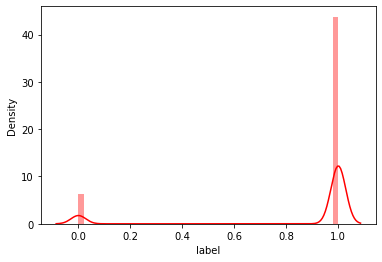

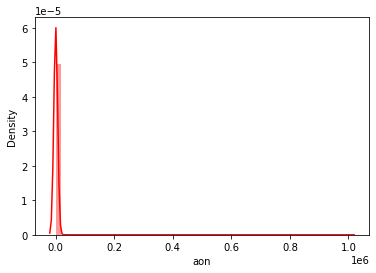

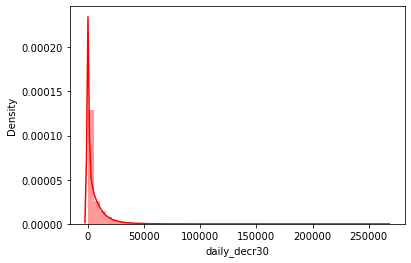

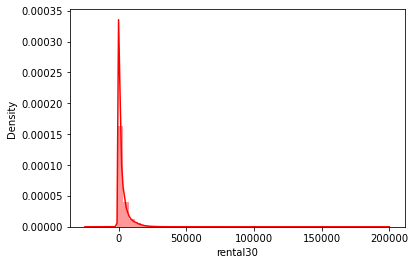

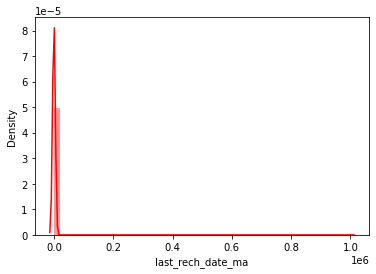

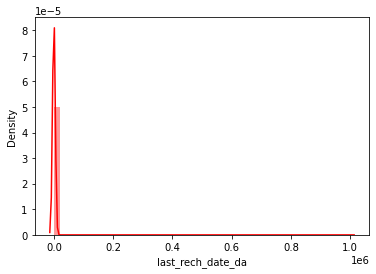

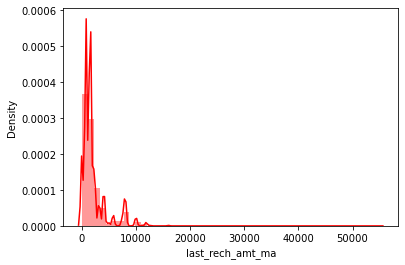

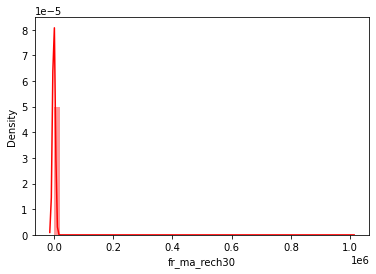

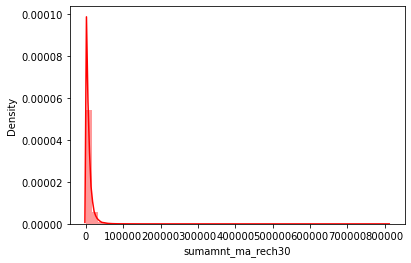

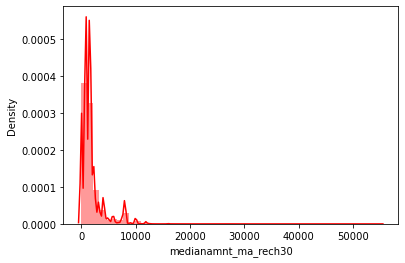

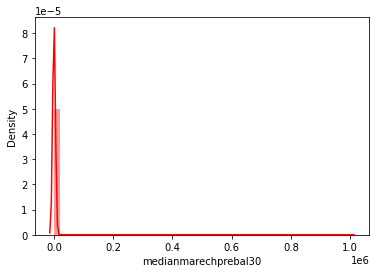

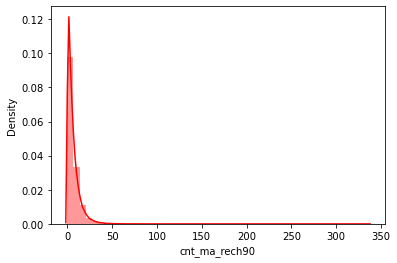

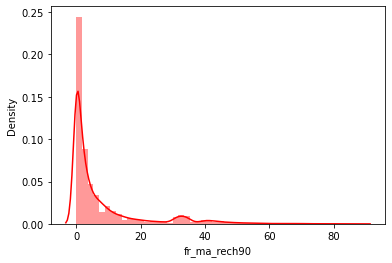

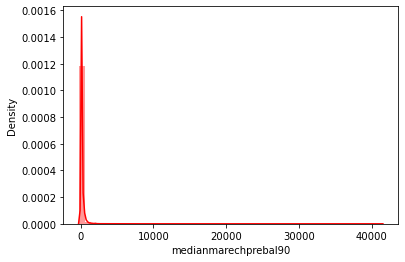

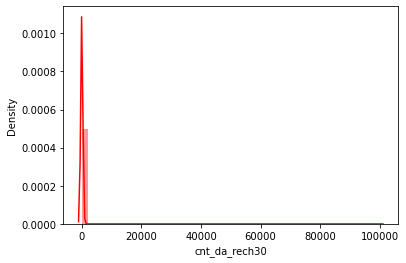

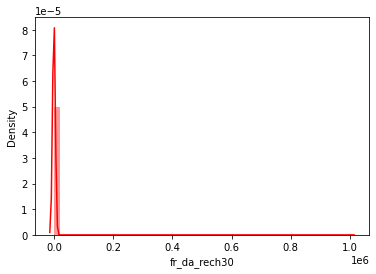

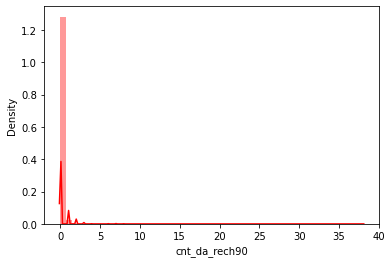

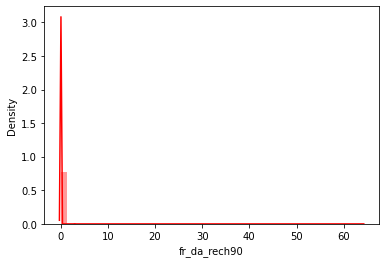

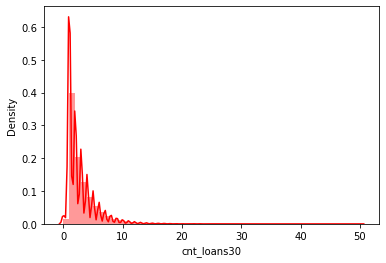

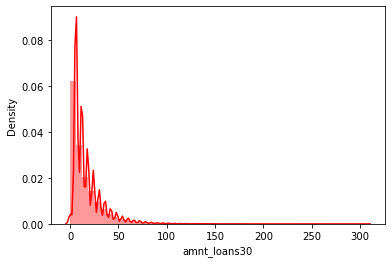

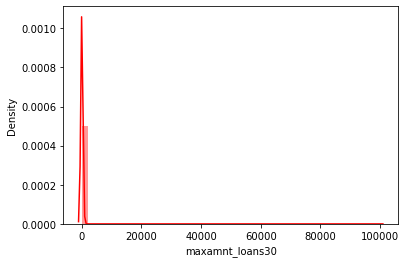

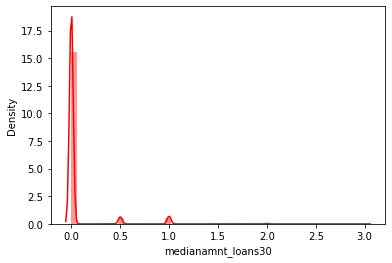

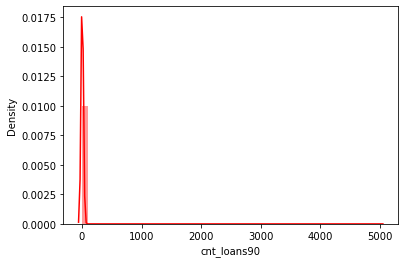

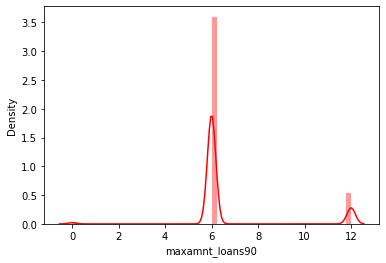

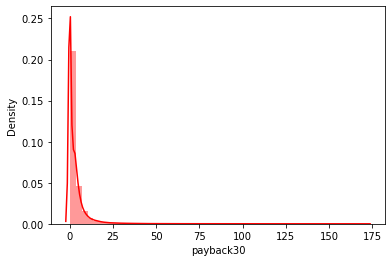

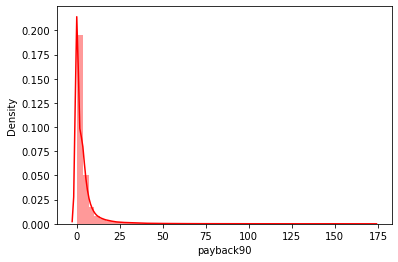

In [74]:
for col in df.describe().columns:
    sns.distplot(df[col],color='r')
    plt.show()

In [17]:
# skewed features are taken into a list

features=['aon','daily_decr30','rental30','last_rech_date_ma','last_rech_amt_ma',
          'fr_ma_rech30','sumamnt_ma_rech30','medianamnt_ma_rech30','medianmarechprebal30','cnt_ma_rech90',
          'fr_ma_rech90','medianmarechprebal90','cnt_da_rech30','fr_da_rech30','cnt_da_rech90','fr_da_rech90',
          'cnt_loans30','amnt_loans30','maxamnt_loans30','medianamnt_loans30','cnt_loans90','maxamnt_loans90',
         'payback30','payback90']

In [18]:
scaler=PowerTransformer(method='yeo-johnson',standardize=True)  # using yeo-johnson method

In [19]:
df[features]=scaler.fit_transform(df[features].values)  # scaling the features

In [20]:
df[features]

,aon,daily_decr30,rental30,last_rech_date_ma,last_rech_amt_ma,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,...,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,maxamnt_loans90,payback30,payback90
0,-0.177112,0.332156,-0.580786,-0.025513,0.083417,1.603299,-0.177906,0.208594,-0.041301,-0.577409,...,-0.162110,-0.064375,0.011773,-0.097563,-0.101998,-0.269051,-0.186805,-0.285611,1.813266,1.783964
1,0.036453,1.116021,0.339736,0.191368,1.501277,-1.128949,0.219811,1.632404,0.016926,-1.027906,...,-0.162110,-0.064375,-0.913019,-0.097563,1.182431,-0.269051,-1.034294,2.325828,-0.937405,-1.018917
2,-0.034659,-0.007508,-0.366965,0.000044,0.083417,-1.128949,-0.535362,0.208594,0.020765,-1.027906,...,-0.162110,-0.064375,-0.913019,-0.894782,-0.101998,-0.269051,-1.034294,-0.285611,-0.937405,-1.018917
3,-0.199213,-1.031486,-0.603059,0.299360,-0.291052,-1.128949,-1.902189,-1.961729,-0.063971,-1.027906,...,-0.162110,-0.064375,0.011773,-0.097563,-0.101998,-0.269051,-0.186805,-0.285611,-0.937405,-1.018917
4,0.114880,-0.682337,-0.310473,0.021231,0.449550,0.188872,1.262660,0.575164,-0.011178,0.657800,...,-0.162110,-0.064375,1.570451,1.454951,-0.101998,-0.269051,1.180312,-0.285611,0.639236,0.431438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,-0.097931,-0.680457,-0.313194,-0.058426,1.051183,0.188872,0.664001,0.903883,0.037462,-0.256024,...,-0.162110,-0.064375,0.011773,-0.097563,-0.101998,-0.269051,-0.186805,-0.285611,0.094998,-0.098305
209589,0.152333,-0.950215,-0.140654,0.021231,-0.429509,-0.239912,-0.175310,-0.303313,0.073687,0.373347,...,-0.162110,-0.064375,0.556347,0.393236,-0.101998,-0.269051,0.300689,-0.285611,0.094998,-0.098305
209590,0.134577,1.100455,0.825400,0.000044,0.083417,1.087596,0.575767,0.208594,0.009245,0.984805,...,-0.162110,-0.064375,0.924658,1.454951,1.182431,-0.269051,1.038116,2.325828,0.974292,0.752939
209591,0.309101,1.136057,-0.515607,-0.025513,-0.429509,0.649604,0.795555,-0.303313,0.074916,0.373347,...,6.168644,-0.064375,0.011773,0.393236,1.182431,-0.269051,0.300689,2.325828,-0.937405,1.337831


In [21]:
df.drop(['Unnamed: 0'],axis=1, inplace=True)

2. Date conversion

In [22]:
df['pdate']=pd.to_datetime(df['pdate'])

In [23]:
# date conversion

df['Year']=df['pdate'].dt.year
df['Month']=df['pdate'].dt.month
df['Day']=df['pdate'].dt.day

In [24]:
df.head()

,label,aon,daily_decr30,rental30,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,...,medianamnt_loans30,cnt_loans90,maxamnt_loans90,payback30,payback90,pcircle,pdate,Year,Month,Day
0,0,-0.177112,0.332156,-0.580786,-0.025513,0.0,0.083417,1.603299,-0.177906,0.208594,...,-0.269051,-0.186805,-0.285611,1.813266,1.783964,UPW,2016-07-20,2016,7,20
1,1,0.036453,1.116021,0.339736,0.191368,0.0,1.501277,-1.128949,0.219811,1.632404,...,-0.269051,-1.034294,2.325828,-0.937405,-1.018917,UPW,2016-08-10,2016,8,10
2,1,-0.034659,-0.007508,-0.366965,0.000044,0.0,0.083417,-1.128949,-0.535362,0.208594,...,-0.269051,-1.034294,-0.285611,-0.937405,-1.018917,UPW,2016-08-19,2016,8,19
3,1,-0.199213,-1.031486,-0.603059,0.299360,0.0,-0.291052,-1.128949,-1.902189,-1.961729,...,-0.269051,-0.186805,-0.285611,-0.937405,-1.018917,UPW,2016-06-06,2016,6,6
4,1,0.114880,-0.682337,-0.310473,0.021231,0.0,0.449550,0.188872,1.262660,0.575164,...,-0.269051,1.180312,-0.285611,0.639236,0.431438,UPW,2016-06-22,2016,6,22


In [25]:
# drop alert, dropping the features that are not required

df.drop(columns=['pdate','Year','pcircle'],axis=1,inplace=True)

In [26]:
df.head()

,label,aon,daily_decr30,rental30,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,maxamnt_loans90,payback30,payback90,Month,Day
0,0,-0.177112,0.332156,-0.580786,-0.025513,0.0,0.083417,1.603299,-0.177906,0.208594,...,0.011773,-0.097563,-0.101998,-0.269051,-0.186805,-0.285611,1.813266,1.783964,7,20
1,1,0.036453,1.116021,0.339736,0.191368,0.0,1.501277,-1.128949,0.219811,1.632404,...,-0.913019,-0.097563,1.182431,-0.269051,-1.034294,2.325828,-0.937405,-1.018917,8,10
2,1,-0.034659,-0.007508,-0.366965,0.000044,0.0,0.083417,-1.128949,-0.535362,0.208594,...,-0.913019,-0.894782,-0.101998,-0.269051,-1.034294,-0.285611,-0.937405,-1.018917,8,19
3,1,-0.199213,-1.031486,-0.603059,0.299360,0.0,-0.291052,-1.128949,-1.902189,-1.961729,...,0.011773,-0.097563,-0.101998,-0.269051,-0.186805,-0.285611,-0.937405,-1.018917,6,6
4,1,0.114880,-0.682337,-0.310473,0.021231,0.0,0.449550,0.188872,1.262660,0.575164,...,1.570451,1.454951,-0.101998,-0.269051,1.180312,-0.285611,0.639236,0.431438,6,22


3. Oulier Detection and removal

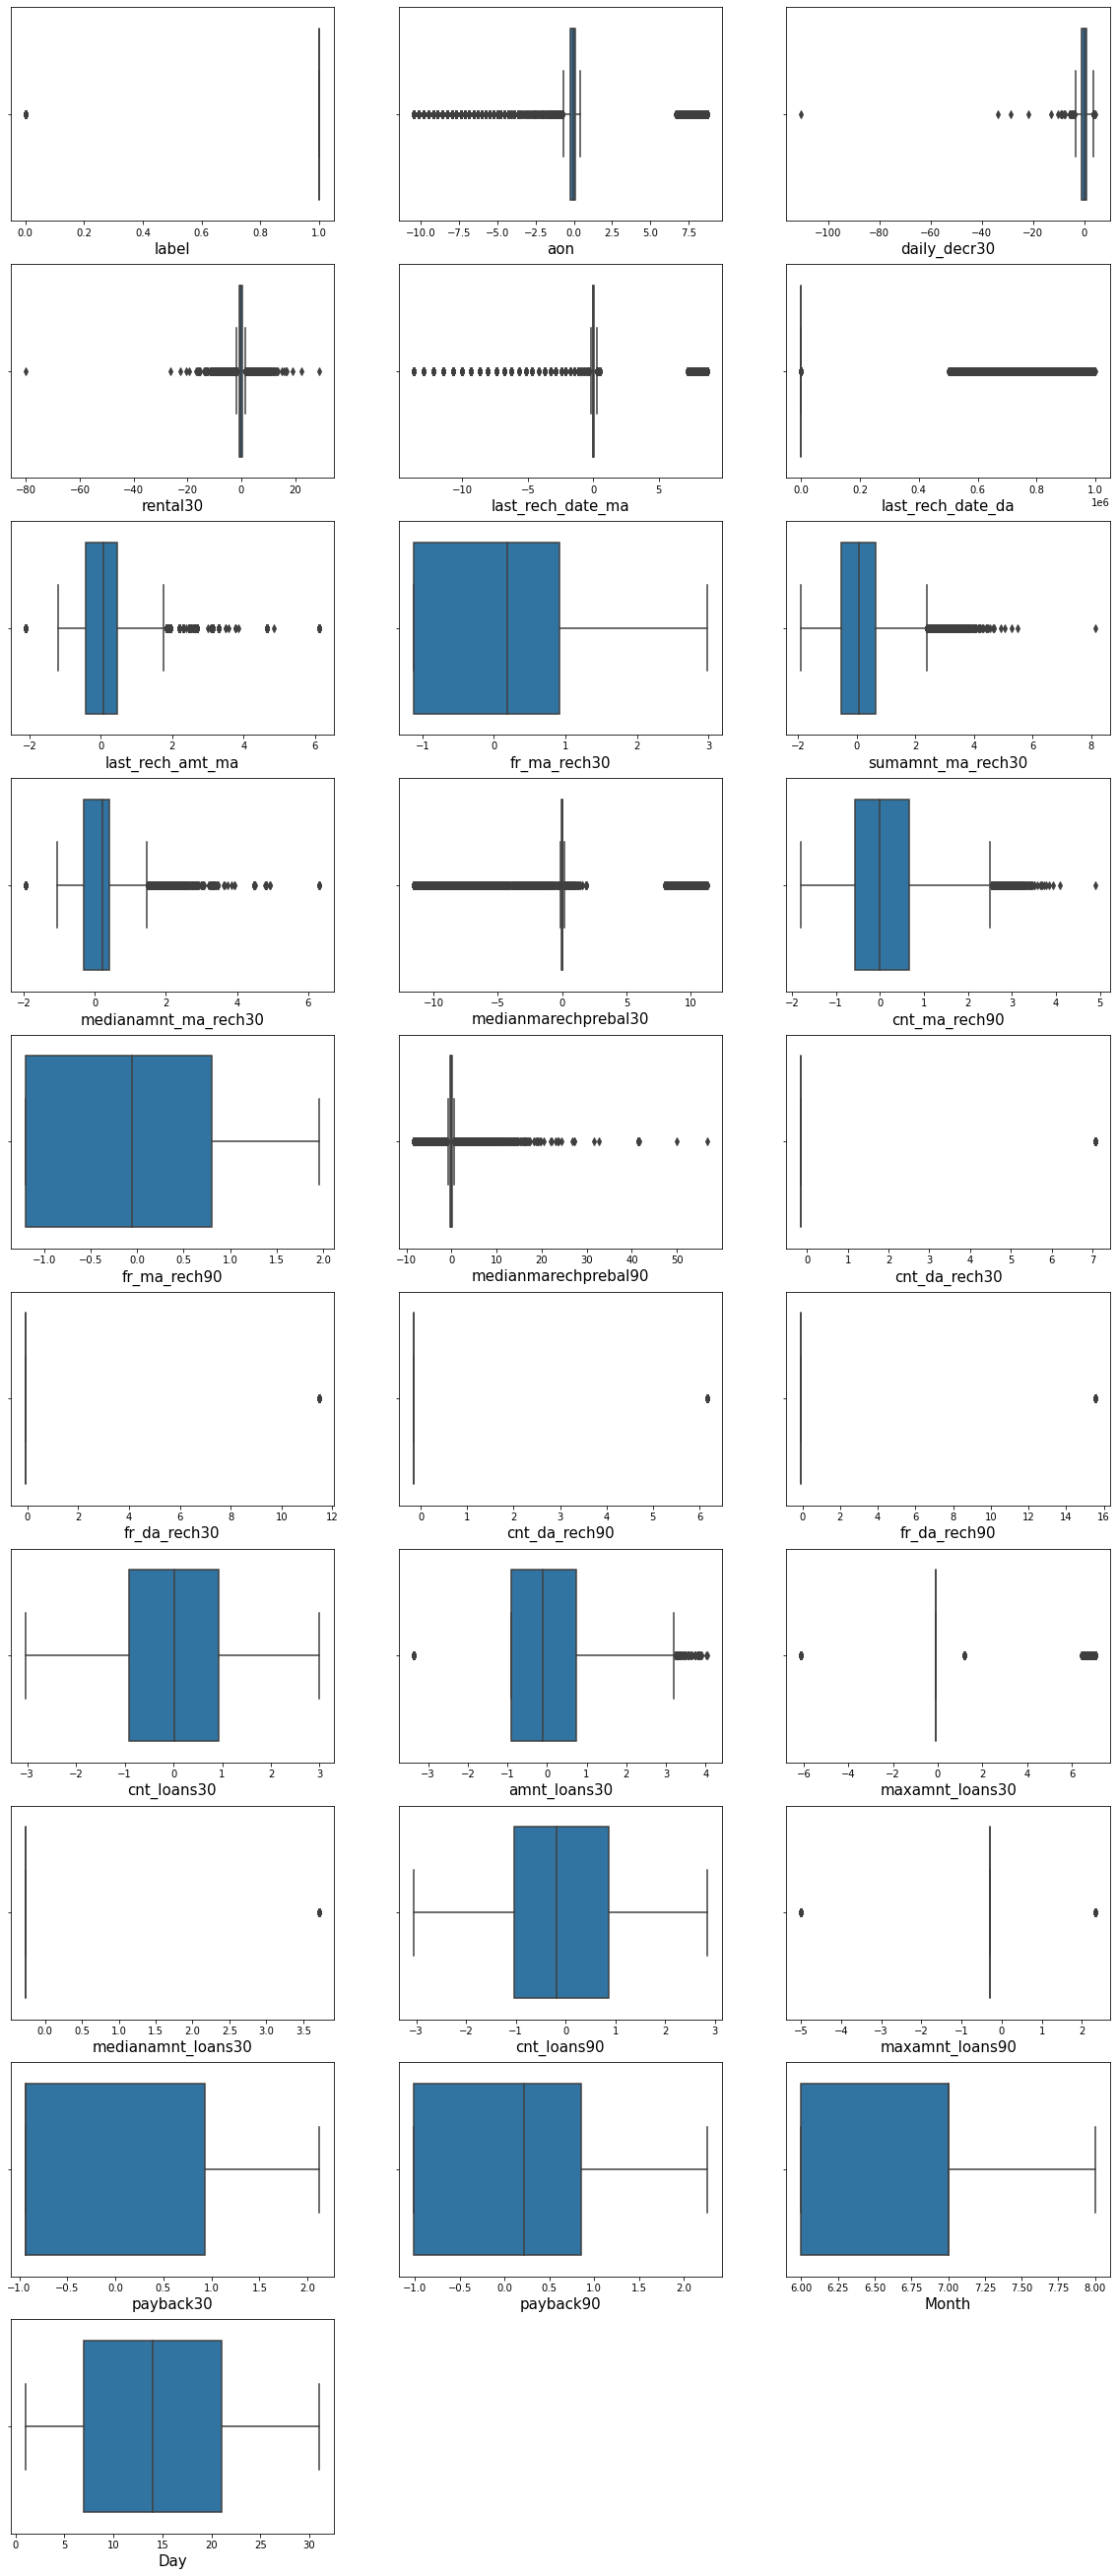

In [27]:
plt.figure(figsize=(20,52),facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=33:
        ax=plt.subplot(11,3,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

In [28]:
z_score = zscore(df[['aon','daily_decr30','rental30','last_rech_date_ma','last_rech_date_da','last_rech_amt_ma',
                     'sumamnt_ma_rech30','medianamnt_ma_rech30','medianmarechprebal30','cnt_ma_rech90','fr_da_rech90',
                     'medianmarechprebal90','amnt_loans30']])   

abs_z_score=np.abs(z_score) #converting data into standard normal distribution

filtering_entry=(abs_z_score<3).all(axis=1)

df=df[filtering_entry]
df.describe()

,label,aon,daily_decr30,rental30,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,maxamnt_loans90,payback30,payback90,Month,Day
count,190867.000000,190867.000000,190867.000000,190867.000000,190867.000000,190867.000000,190867.000000,190867.000000,190867.000000,190867.000000,...,190867.000000,190867.000000,190867.000000,190867.000000,190867.000000,190867.000000,190867.000000,190867.000000,190867.000000,190867.000000
mean,0.873242,-0.037163,-0.020854,-0.061255,0.016764,0.859468,-0.028380,0.006491,-0.015529,-0.021051,...,0.052646,0.053151,0.089975,0.003948,0.036370,0.038885,0.021342,0.014904,6.778563,14.459550
std,0.332703,0.208169,0.948459,0.743344,0.107154,6.835657,0.987937,0.997324,0.982464,0.984464,...,0.925460,0.901582,0.641355,1.006777,0.951726,0.861456,1.001102,0.997661,0.732642,8.399387
min,0.000000,-2.868250,-2.951240,-2.998313,-2.850891,-29.000000,-2.115772,-1.128949,-1.902189,-1.961729,...,-0.913019,-0.894782,-0.101998,-0.269051,-1.034294,-0.285611,-0.937405,-1.018917,6.000000,1.000000
25%,1.000000,-0.196261,-0.930608,-0.560679,-0.058426,0.000000,-0.432065,-1.128949,-0.534158,-0.305859,...,-0.913019,-0.894782,-0.101998,-0.269051,-1.034294,-0.285611,-0.937405,-1.018917,6.000000,7.000000
50%,1.000000,-0.041804,-0.021561,-0.326053,0.000044,0.000000,0.083417,0.188872,0.069979,0.208594,...,0.011773,-0.097563,-0.101998,-0.269051,-0.186805,-0.285611,0.094998,0.254914,7.000000,14.000000
75%,1.000000,0.118223,0.767402,0.205176,0.070105,0.000000,0.449550,0.911241,0.631792,0.403712,...,0.924658,0.749156,-0.101998,-0.269051,0.859101,-0.285611,0.955493,0.853787,7.000000,21.000000
max,1.000000,0.439032,2.981902,2.999791,0.493635,115.000000,2.687866,2.981190,2.999990,2.996583,...,2.574368,2.993066,7.040674,3.716814,2.844208,2.325828,2.120943,2.259043,8.000000,31.000000


In [29]:
x=df.drop(columns=['label'])

In [30]:
x

,aon,daily_decr30,rental30,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,maxamnt_loans90,payback30,payback90,Month,Day
0,-0.177112,0.332156,-0.580786,-0.025513,0.0,0.083417,1.603299,-0.177906,0.208594,-0.041301,...,0.011773,-0.097563,-0.101998,-0.269051,-0.186805,-0.285611,1.813266,1.783964,7,20
1,0.036453,1.116021,0.339736,0.191368,0.0,1.501277,-1.128949,0.219811,1.632404,0.016926,...,-0.913019,-0.097563,1.182431,-0.269051,-1.034294,2.325828,-0.937405,-1.018917,8,10
2,-0.034659,-0.007508,-0.366965,0.000044,0.0,0.083417,-1.128949,-0.535362,0.208594,0.020765,...,-0.913019,-0.894782,-0.101998,-0.269051,-1.034294,-0.285611,-0.937405,-1.018917,8,19
3,-0.199213,-1.031486,-0.603059,0.299360,0.0,-0.291052,-1.128949,-1.902189,-1.961729,-0.063971,...,0.011773,-0.097563,-0.101998,-0.269051,-0.186805,-0.285611,-0.937405,-1.018917,6,6
4,0.114880,-0.682337,-0.310473,0.021231,0.0,0.449550,0.188872,1.262660,0.575164,-0.011178,...,1.570451,1.454951,-0.101998,-0.269051,1.180312,-0.285611,0.639236,0.431438,6,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,-0.097931,-0.680457,-0.313194,-0.058426,0.0,1.051183,0.188872,0.664001,0.903883,0.037462,...,0.011773,-0.097563,-0.101998,-0.269051,-0.186805,-0.285611,0.094998,-0.098305,6,17
209589,0.152333,-0.950215,-0.140654,0.021231,0.0,-0.429509,-0.239912,-0.175310,-0.303313,0.073687,...,0.556347,0.393236,-0.101998,-0.269051,0.300689,-0.285611,0.094998,-0.098305,6,12
209590,0.134577,1.100455,0.825400,0.000044,0.0,0.083417,1.087596,0.575767,0.208594,0.009245,...,0.924658,1.454951,1.182431,-0.269051,1.038116,2.325828,0.974292,0.752939,7,29
209591,0.309101,1.136057,-0.515607,-0.025513,38.0,-0.429509,0.649604,0.795555,-0.303313,0.074916,...,0.011773,0.393236,1.182431,-0.269051,0.300689,2.325828,-0.937405,1.337831,7,25


In [31]:
y=df['label']

In [32]:
y

0         0
1         1
2         1
3         1
4         1
         ..
209588    1
209589    1
209590    1
209591    1
209592    1
Name: label, Length: 190867, dtype: int64

# Oversampling to resolve imbalancing of the dataset:-

In [33]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y= sm.fit_resample(x,y)

In [34]:
y.value_counts()

0    166673
1    166673
Name: label, dtype: int64

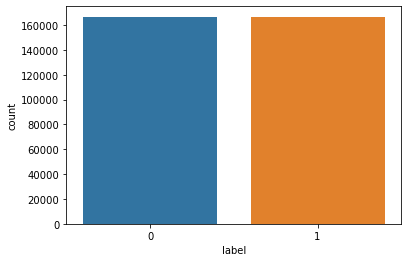

In [35]:
sns.countplot(y)
plt.show()

Now, the dataset is balanced.

# Standardization:-

In [36]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Feature Importance:-

In [37]:
from sklearn.ensemble import ExtraTreesRegressor
extra=ExtraTreesRegressor()
extra.fit(x,y)

ExtraTreesRegressor()

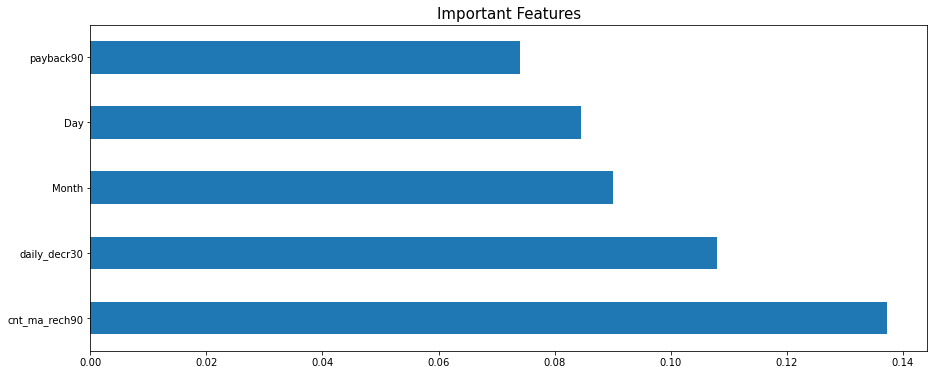

In [40]:
plt.figure(figsize=(15,6))
plt.title('Important Features',fontsize=15)
feat_importance=pd.Series(extra.feature_importances_,index=x.columns)
feat_importance.nlargest().plot(kind='barh')
plt.show()           

Above shown are the most importance features used in the detection of 'Micro Credit Loan'.

# Modelling Phase:-

In [41]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_roc_curve,roc_auc_score

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=42)

Logistic Regression

In [43]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_train)
lr_clf_report = pd.DataFrame(classification_report(y_train,lr_pred,output_dict=True))
print("\n=======================Train Result===========================")
print(f"Accuracy score:{accuracy_score(y_train,lr_pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{lr_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,lr_pred)}\n")


=======================Train Result===========================
Accuracy score:77.60%
_______________________________________________________________
CLASSIFICATION REPORT:
                       0              1  accuracy      macro avg  \
precision       0.773375       0.778686  0.776008       0.776031   
recall          0.780420       0.771601  0.776008       0.776011   
f1-score        0.776882       0.775127  0.776008       0.776005   
support    124925.000000  125084.000000  0.776008  250009.000000   

            weighted avg  
precision       0.776032  
recall          0.776008  
f1-score        0.776004  
support    250009.000000  
________________________________________________________________
 Confusion Matrix:
[[97494 27431]
 [28569 96515]]



In [44]:
lr_pred=lr.predict(x_test)
lr_clf_report = pd.DataFrame(classification_report(y_test,lr_pred,output_dict=True))
print("\n=======================Test Result of LR ===========================")
print(f"Accuracy score:{accuracy_score(y_test,lr_pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{lr_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,lr_pred)}\n")     


=======================Test Result of LR ===========================
Accuracy score:77.64%
_______________________________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.773766      0.779083   0.77639      0.776425       0.77642
recall         0.782385      0.770372   0.77639      0.776378       0.77639
f1-score       0.778052      0.774703   0.77639      0.776377       0.77638
support    41748.000000  41589.000000   0.77639  83337.000000   83337.00000
________________________________________________________________
 Confusion Matrix:
[[32663  9085]
 [ 9550 32039]]



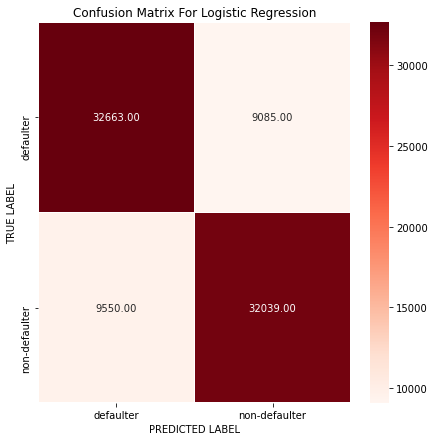

In [45]:
cm = confusion_matrix(y_test,lr_pred)

x_axis_labels=['defaulter','non-defaulter']
y_axis_labels=['defaulter','non-defaulter']

ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=0.1,fmt='.2f',cmap='Reds',xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel('PREDICTED LABEL')
plt.ylabel('TRUE LABEL')
plt.title('Confusion Matrix For Logistic Regression')

plt.show()

In [46]:
#checking ROC_AUC Score of Logistic Regression:

roc_auc_score(y_test,lr.predict(x_test))

0.7763783791291078

Decision Tree Classifier

In [47]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_pred = dt.predict(x_train)
dt_clf_report = pd.DataFrame(classification_report(y_train,dt_pred,output_dict=True))
print("\n=======================Train Result===========================")
print(f"Accuracy score:{accuracy_score(y_train,dt_pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{dt_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,dt_pred)}\n")


=======================Train Result===========================
Accuracy score:100.00%
_______________________________________________________________
CLASSIFICATION REPORT:
                       0              1  accuracy      macro avg  \
precision       0.999952       1.000000  0.999976       0.999976   
recall          1.000000       0.999952  0.999976       0.999976   
f1-score        0.999976       0.999976  0.999976       0.999976   
support    124925.000000  125084.000000  0.999976  250009.000000   

            weighted avg  
precision       0.999976  
recall          0.999976  
f1-score        0.999976  
support    250009.000000  
________________________________________________________________
 Confusion Matrix:
[[124925      0]
 [     6 125078]]



In [48]:
dt_pred=dt.predict(x_test)
dt_clf_report = pd.DataFrame(classification_report(y_test,dt_pred,output_dict=True))
print("\n=======================Test Result of dt_clf===========================")
print(f"Accuracy score:{accuracy_score(y_test,dt_pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{dt_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,dt_pred)}\n")            


=======================Test Result of dt_clf===========================
Accuracy score:90.77%
_______________________________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.904062      0.911421    0.9077      0.907742      0.907735
recall         0.912595      0.902787    0.9077      0.907691      0.907700
f1-score       0.908308      0.907083    0.9077      0.907696      0.907697
support    41748.000000  41589.000000    0.9077  83337.000000  83337.000000
________________________________________________________________
 Confusion Matrix:
[[38099  3649]
 [ 4043 37546]]



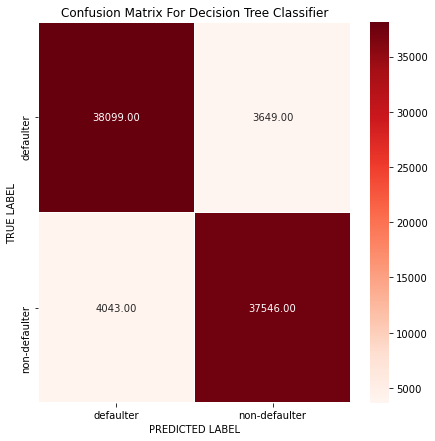

In [49]:
cm = confusion_matrix(y_test,dt_pred)

x_axis_labels=['defaulter','non-defaulter']
y_axis_labels=['defaulter','non-defaulter']

ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=0.1,fmt='.2f',cmap='Reds',xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel('PREDICTED LABEL')
plt.ylabel('TRUE LABEL')
plt.title('Confusion Matrix For Decision Tree Classifier')

plt.show()

In [50]:
#ROC_AUC Score of Decision Tree Classifier:

roc_auc_score(y_test,dt.predict(x_test))

0.90769070494801

Random Forest Classifier

In [51]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
rf_pred = rf.predict(x_train)
rf_clf_report = pd.DataFrame(classification_report(y_train,rf_pred,output_dict=True))
print("\n=======================Train Result===========================")
print(f"Accuracy score:{accuracy_score(y_train,rf_pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{rf_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,rf_pred)}\n")


=======================Train Result===========================
Accuracy score:100.00%
_______________________________________________________________
CLASSIFICATION REPORT:
                       0              1  accuracy      macro avg  \
precision       0.999960       0.999984  0.999972       0.999972   
recall          0.999984       0.999960  0.999972       0.999972   
f1-score        0.999972       0.999972  0.999972       0.999972   
support    124925.000000  125084.000000  0.999972  250009.000000   

            weighted avg  
precision       0.999972  
recall          0.999972  
f1-score        0.999972  
support    250009.000000  
________________________________________________________________
 Confusion Matrix:
[[124923      2]
 [     5 125079]]



In [52]:
rf_pred=rf.predict(x_test)
rf_clf_report = pd.DataFrame(classification_report(y_test,rf_pred,output_dict=True))
print("\n=======================Test Result of RF_clf===========================")
print(f"Accuracy score:{accuracy_score(y_test,rf_pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{rf_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,rf_pred)}\n")   


=======================Test Result of RF_clf===========================
Accuracy score:94.99%
_______________________________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.947331      0.952539  0.949914      0.949935      0.949930
recall         0.953004      0.946813  0.949914      0.949908      0.949914
f1-score       0.950159      0.949667  0.949914      0.949913      0.949913
support    41748.000000  41589.000000  0.949914  83337.000000  83337.000000
________________________________________________________________
 Confusion Matrix:
[[39786  1962]
 [ 2212 39377]]



Text(0.5, 1.0, 'Confusion Matrix For Random Forest Classifier')

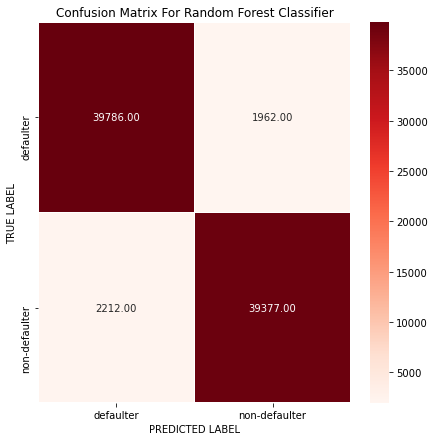

In [53]:
cm = confusion_matrix(y_test,rf_pred)

x_axis_labels=['defaulter','non-defaulter']
y_axis_labels=['defaulter','non-defaulter']

ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=0.1,fmt='.2f',cmap='Reds',xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel('PREDICTED LABEL')
plt.ylabel('TRUE LABEL')
plt.title('Confusion Matrix For Random Forest Classifier')

In [54]:
#ROC_AOC Score of Random Forest Classifier:

roc_auc_score(y_test,rf.predict(x_test))

0.9499082979377209

Gradient Boosting Classifier

In [55]:
gbdt_clf = GradientBoostingClassifier()
gbdt_clf.fit(x_train,y_train)
pred=gbdt_clf.predict(x_train)
gbdt_clf_report = pd.DataFrame(classification_report(y_train,pred,output_dict=True))
print("\n=======================Train Result===========================")
print(f"Accuracy score:{accuracy_score(y_train,pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{gbdt_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,pred)}\n")


=======================Train Result===========================
Accuracy score:90.39%
_______________________________________________________________
CLASSIFICATION REPORT:
                       0              1  accuracy      macro avg  \
precision       0.892807       0.915542  0.903863       0.904174   
recall          0.917799       0.889946  0.903863       0.903872   
f1-score        0.905130       0.902563  0.903863       0.903846   
support    124925.000000  125084.000000  0.903863  250009.000000   

            weighted avg  
precision       0.904181  
recall          0.903863  
f1-score        0.903846  
support    250009.000000  
________________________________________________________________
 Confusion Matrix:
[[114656  10269]
 [ 13766 111318]]



In [56]:
pred=gbdt_clf.predict(x_test)
clf_report = pd.DataFrame(classification_report(y_test,pred,output_dict=True))
print("\n=======================Test Result===========================")
print(f"Accuracy score:{accuracy_score(y_test,pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,pred)}\n") 


=======================Test Result===========================
Accuracy score:90.31%
_______________________________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.891918      0.914981  0.903092      0.903449      0.903427
recall         0.917769      0.888360  0.903092      0.903064      0.903092
f1-score       0.904658      0.901474  0.903092      0.903066      0.903069
support    41748.000000  41589.000000  0.903092  83337.000000  83337.000000
________________________________________________________________
 Confusion Matrix:
[[38315  3433]
 [ 4643 36946]]



Text(0.5, 1.0, 'Confusion Matrix Of Gradient Boosting Classifier')

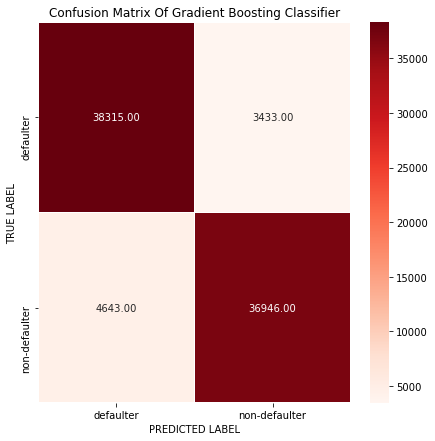

In [57]:
cm = confusion_matrix(y_test,pred)

x_axis_labels=['defaulter','non-defaulter']
y_axis_labels=['defaulter','non-defaulter']

ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=0.1,fmt='.2f',cmap='Reds',xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel('PREDICTED LABEL')
plt.ylabel('TRUE LABEL')
plt.title('Confusion Matrix Of Gradient Boosting Classifier')

In [58]:
#ROC_AUC Score of Gradient Boosting Classifier:

roc_auc_score(y_test,gbdt_clf.predict(x_test))

0.903064209357988

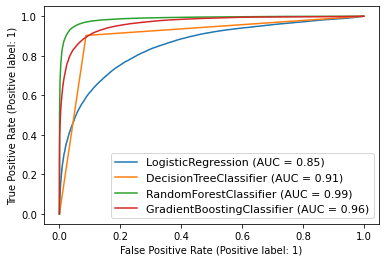

In [59]:
# Let's check ROC_AUC curve for fitted models:

disp = plot_roc_curve(lr,x_test,y_test)
plot_roc_curve(dt,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)
plot_roc_curve(gbdt_clf,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

The AUC curve of Random Forest Classifier has covered 99% area under the curve.

# Cross validation:-

In [60]:
# Checking Cross Validation score for Logistic Regression:

print(f" CV Score of LR:{cross_val_score(lr,x,y,cv=5).mean()*100:.2f}%")

 CV Score of LR:77.52%


In [61]:
# Checking Cross Validation score of Decision Tree Classifier:

print(f"CV Score of DT:{cross_val_score(dt,x,y,cv=5).mean()*100:.2f}%")

CV Score of DT:90.66%


In [62]:
# Checking Cross Validation of Random Forest Classifier:

print(f"CV Score of RF:{cross_val_score(rf,x,y,cv=5).mean()*100:.2f}%")

CV Score of RF:94.67%


In [63]:
#Checking Cross Validation Score of Gradient Boosting Classifier:

print(f"CV Score of Gradient Boosting Classifier:{cross_val_score(gbdt_clf,x,y,cv=5).mean()*100:.2f}%")

CV Score of Gradient Boosting Classifier:89.69%


CV Score of Gradient Boosting Classifier:89.90%
Now let's check the difference between Accuracy Score and Cross Validation Score to select the best model from the 5 models:

Diffrence betwwwn Accuracy score and Cross Validation Score of 4 different models :
LR = 77.64-77.52 = 0.12
DT = 90.77-90.66 = 0.11
Rf = 94.99-94.67 = 0.32
Gbdt_clf = 90.31-89.69 = 0.62
So, as the accuracy score of Random Forest Classifier is 95% and as the difference of Accuracy Score and CV of Random Forest 
Classifier is very less, it's the best Model.

In [ ]:
Finalizing the best Model:-

# Hyperparameter Tuning:-

In [64]:
rf = RandomForestClassifier()
params={'n_estimators':[12,15,17],
       'criterion':['entropy','gini'],
       'max_depth':[10,15,17],
       'min_samples_split':[10,12,13],
       'min_samples_leaf':[4,6,8]}

In [65]:
grd= GridSearchCV(rf,param_grid=params)
grd.fit(x_train,y_train)
print('best_params=> ',grd.best_params_)

best_params=>  {'criterion': 'gini', 'max_depth': 17, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 17}


In [76]:
rf=RandomForestClassifier(criterion='gini',max_depth=17, min_samples_leaf=4,min_samples_split=10,n_estimators=17)
rf.fit(x_train,y_train)
train_accuracy=rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)
print(train_accuracy)
accuracy=accuracy_score(y_test,pred_decision)
print('Accuracy_Score',accuracy)
rfs=cross_val_score(rf,x_scaled,y,cv=5)
rfc=rf.score(x_train,y_train)
print('Cross_Val_Score',rfc*100)

0.9426700638777004
Accuracy_Score 0.9249193035506438
Cross_Val_Score 94.26700638777004


In [67]:
rfc_conf_mat = confusion_matrix(y_test,y_pred)
print('con_mat=> ','\n',rfc_conf_mat)
print('Accuracy of rf After Hyperparameter Tuning==> ',accuracy_score(y_test,y_pred)*100)

con_mat=>  
 [[38987  2761]
 [ 3515 38074]]
Accuracy of rf After Hyperparameter Tuning==>  92.46913135822024


In [68]:
Report = classification_report(y_test,y_pred)
print(Report)

              precision    recall  f1-score   support

           0       0.92      0.93      0.93     41748
           1       0.93      0.92      0.92     41589

    accuracy                           0.92     83337
   macro avg       0.92      0.92      0.92     83337
weighted avg       0.92      0.92      0.92     83337



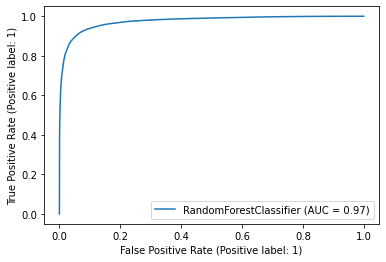

In [69]:
disp = plot_roc_curve(rfc,x_test,y_test)

We can conclude, Random Forest Classifier (without hyperparameter tuning )is the best model as the density of area under curve 
is showing almost 99%.

# Saving the Model:-

In [77]:
import pickle
filename='Micro_Credit_Pred.pkl'
pickle.dump(rf,open(filename,'wb'))

# Conclusion:-

In [78]:
import numpy as np
a=np.array(y_test)
predicted=np.array(rf.predict(x_test))
Micro_Credit_Loan=pd.DataFrame({'original':a,'predicted':predicted},index=range(len(a)))
Micro_Credit_Loan

,original,predicted
0,0,0
1,0,0
2,0,0
3,1,1
4,1,1
...,...,...
83332,0,0
83333,1,1
83334,1,1
83335,1,1


# Insights:-

The results of this study suggest following outputs which might be useful in Micro Loan Credit Detection:  

    
1. A Microfinance Institution (MFI) is an organization that offers financial services to low income populations. This sector
   understand the importance of communication and how it affects a person’s life, thus, focusing on providing their services 
   and products to low income families and poor customers that can help them in the need of hour.


        
2. Data Analysis focuses how MFS becomes very useful when targeting especially the factors that helpful in implementing micro 
   financial services for unbanked poor families living in remote areas with not much sources of income.The graphs shows 
   probability of paidback the credit amounts in respective time periods.
 